In [60]:
#Librerias y funciones
import IPython
from scipy.io import wavfile
import numpy as np
from numpy import cos, pi, arange
from scipy.signal import lfilter, firwin, freqz
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.fft import fft, fftfreq

#Funcion para realizar un FFT de una señal (Usado en la tarea 3)
nsamples = 150
sample_rate = 8000
t = np.linspace(0,0.01875,nsamples)

def plotfft(func):
    F = fft(func)
    tf = fftfreq(nsamples,1/sample_rate)
    return tf,F

### Parte 1: Procesado de señales de voz

In [68]:
#Audios de entrada
#Audios hombre
Fs_ha, ha = wavfile.read("ha.wav")
#ha = ha[3000:3000+nsamples]
Fs_he, he = wavfile.read("he.wav")
Fs_hi, hi = wavfile.read("hi.wav")
Fs_ho, ho = wavfile.read("ho.wav")
Fs_hu, hu = wavfile.read("hu.wav")

#Audios mujer
Fs_ma, ma = wavfile.read("ma.wav")
Fs_me, me = wavfile.read("me.wav")
Fs_mi, mi = wavfile.read("mi.wav")
Fs_mo, mo = wavfile.read("mo.wav")
Fs_mu, mu = wavfile.read("mu.wav")

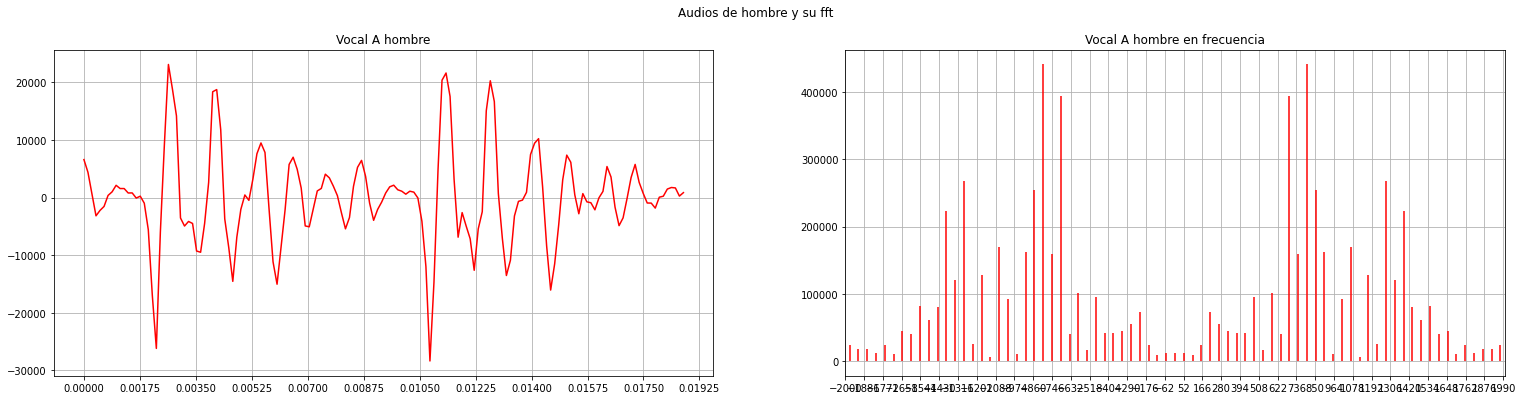

In [66]:
fig1, axs = plt.subplots(1,2,figsize=(26,6))
fig1.suptitle('Audios de hombre y su fft')

axs[0].plot(t,ha,color='red')
axs[0].set_title('Vocal A hombre')
axs[0].xaxis.set_major_locator(MultipleLocator(0.0175/10))
axs[0].grid()
Mtf, M = plotfft(ha)
axs[1].set(xlim=(-2000,2000),xticks=(range(-2000,2000,114)))
axs[1].vlines(Mtf,0,np.abs(M),color='red')
axs[1].set_title('Vocal A hombre en frecuencia')
axs[1].grid()


plt.show()

(0.0, 1000.0)

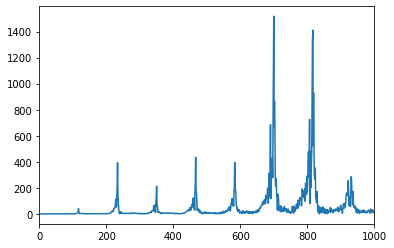

In [72]:
x=ha
Fs = Fs_ha
fouriertransform = fft(x)/len(x)
fouriertransform = fouriertransform[range(int(len(x)/2))]

tpCount = len(x)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/Fs
frequencies = values/timePeriod
plt.plot(frequencies,abs(fouriertransform))
plt.xlim(0,1000)

In [55]:
freq = 1/0.00875
print(freq)

114.28571428571428


### Parte 2: Filtrado digital

In [3]:
#Definicion de variables y señales

#------------------------------------------------
# Espacio temporal
#------------------------------------------------
T = 4/60
nsamples = 400
sample_rate = nsamples/T

#------------------------------------------------
# Señal de entrada (60Hz, 180Hz, 360Hz)
#------------------------------------------------
t = arange(nsamples) / sample_rate
f1 = 60
f2 = 180
f3 = 360
x1 = cos(2*pi*f1*t)
x2 = cos(2*pi*f2*t)
x3 = cos(2*pi*f3*t)
x = x1 + x2 + x3

def plotfft(func):
    F = fft(func)
    tf = fftfreq(nsamples, 1/sample_rate)
    return tf,F

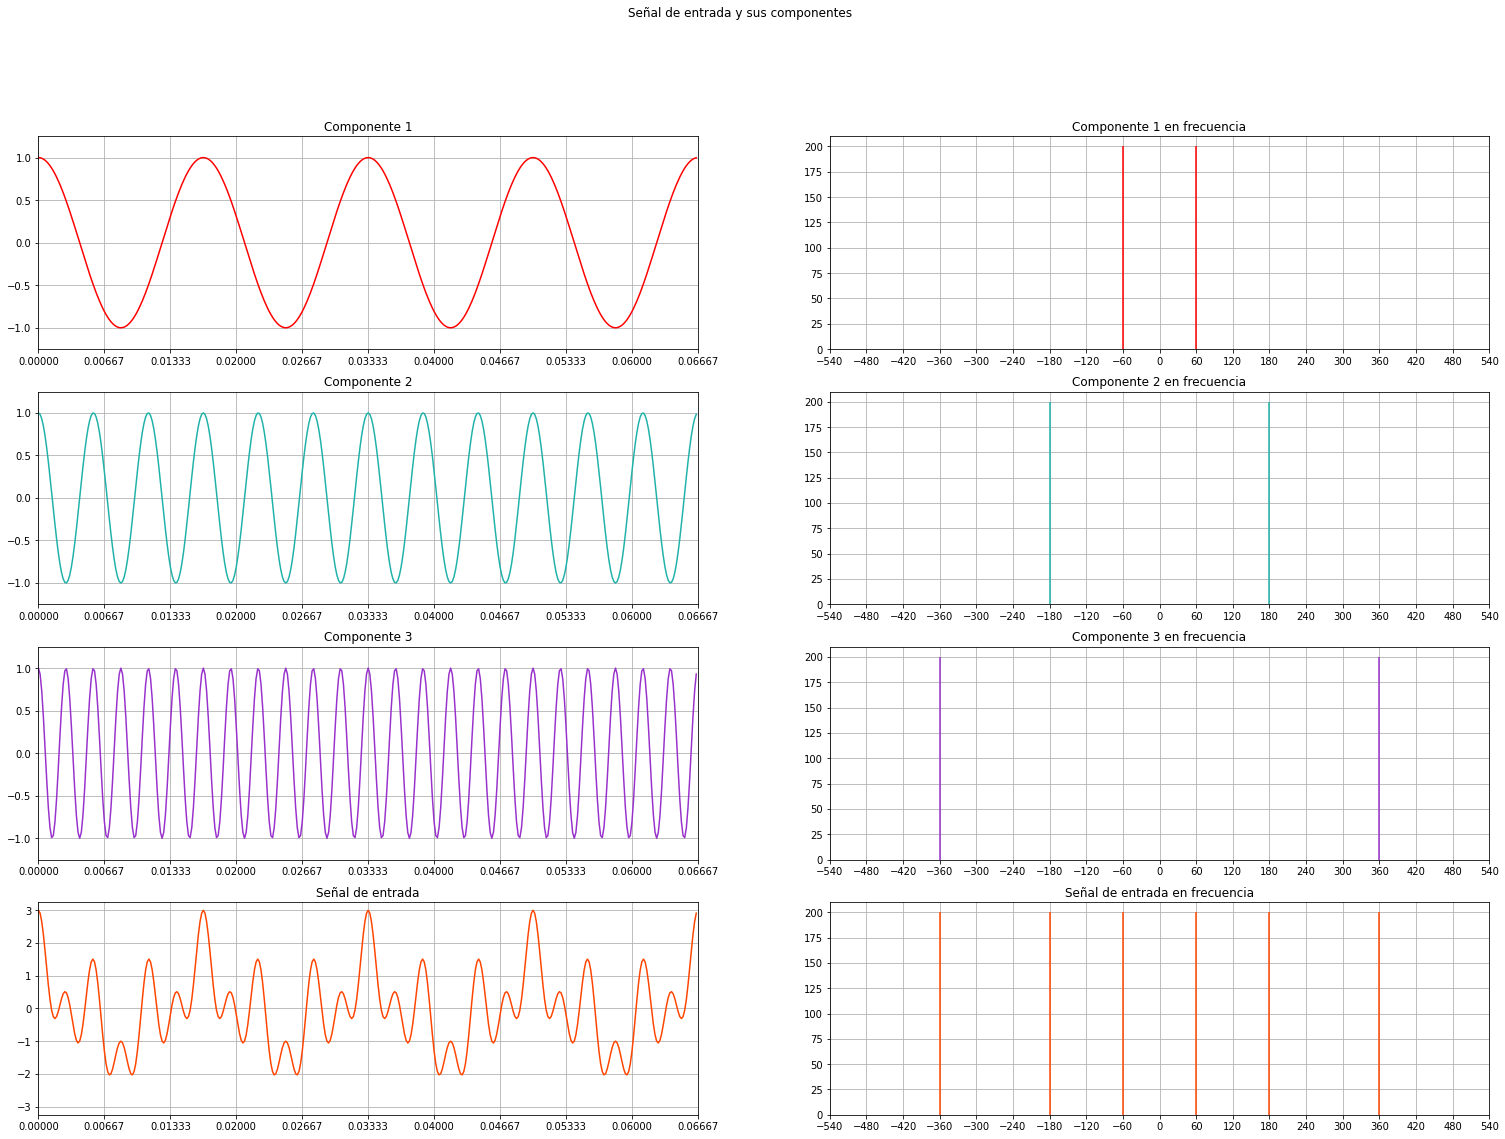

In [8]:
#Plot de las señales
fig1, axs = plt.subplots(4,2,figsize=(26,18))
fig1.suptitle('Señal de entrada y sus componentes')

axs[0,0].plot(t,x1,color='red')
axs[0,0].set_title('Componente 1')
axs[0,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[0,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[0,0].grid()

Mtf, M = plotfft(x1)
axs[0,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].set_title('Componente 1 en frecuencia')
axs[0,1].grid()

axs[1,0].plot(t,x2,color='lightseagreen')
axs[1,0].set_title('Componente 2')
axs[1,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[1,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1,0].grid()

Mtf, M = plotfft(x2)
axs[1,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[1,1].vlines(Mtf,0,np.abs(M),color='lightseagreen')
axs[1,1].set_title('Componente 2 en frecuencia')
axs[1,1].grid()

axs[2,0].plot(t,x3,color='darkorchid')
axs[2,0].set_title('Componente 3')
axs[2,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[2,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[2,0].grid()

Mtf, M = plotfft(x3)
axs[2,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[2,1].vlines(Mtf,0,np.abs(M),color='darkorchid')
axs[2,1].set_title('Componente 3 en frecuencia')
axs[2,1].grid()

axs[3,0].plot(t,x,color='orangered')
axs[3,0].set_title('Señal de entrada')
axs[3,0].set(xlim=(0,T),ylim=(-3.25,3.25))
axs[3,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[3,0].grid()

Mtf, M = plotfft(x)
axs[3,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[3,1].vlines(Mtf,0,np.abs(M),color='orangered')
axs[3,1].set_title('Señal de entrada en frecuencia')
axs[3,1].grid()


plt.show()

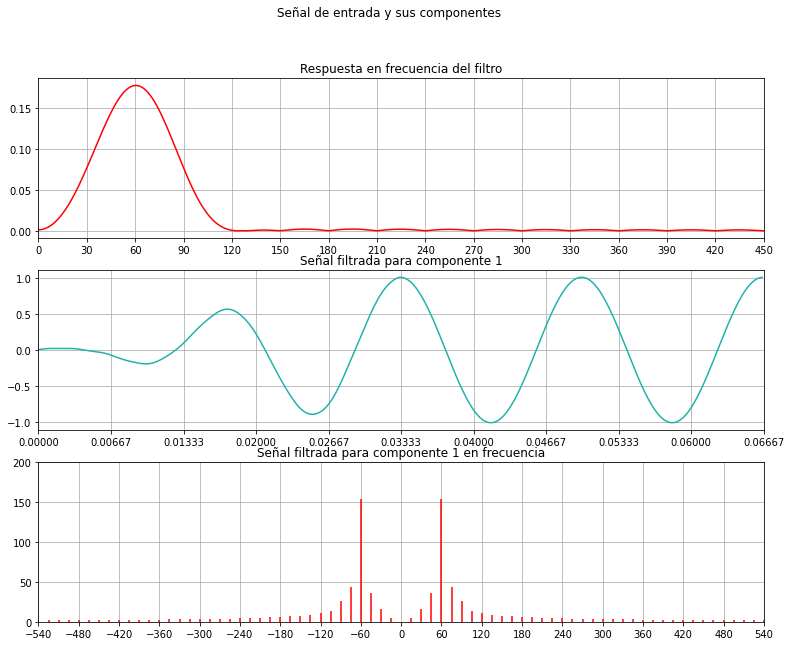

In [76]:
#------------------------------------------------
# Filtro FIR para filtrar componente 1
#------------------------------------------------

def bandpass_firwin(ntaps, lowcut, highcut, fs=sample_rate, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

# Sample rate and desired cutoff frequencies (in Hz).
lowcut1 = f1-5
highcut1 = f1+5

ntaps = 200
taps_hamming1 = bandpass_firwin(ntaps, lowcut1, highcut1, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x1 = 5.71*lfilter(taps_hamming1, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming1, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x1,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 1')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x1)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 1 en frecuencia')
axs[2].grid()

plt.show()

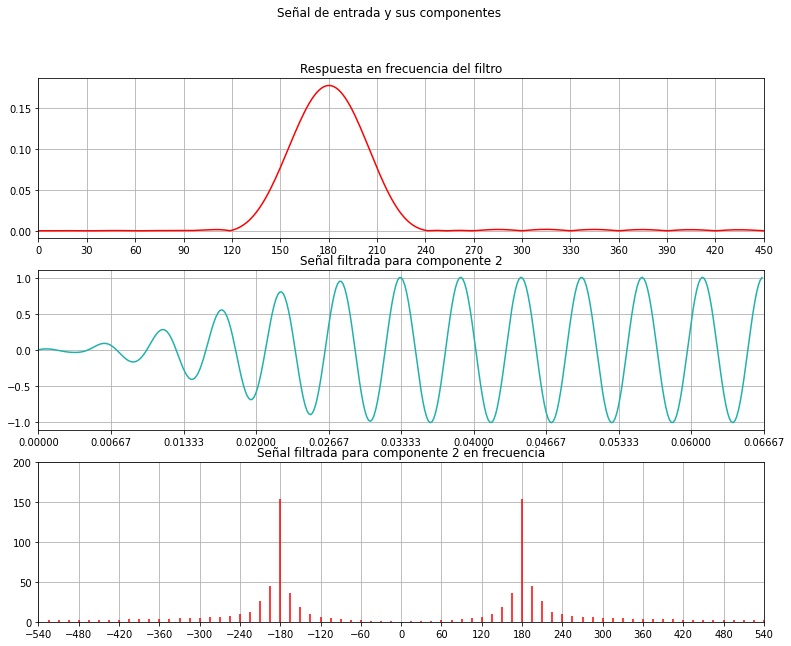

In [25]:
lowcut2 = f2-5
highcut2 = f2+5

ntaps = 200
taps_hamming2 = bandpass_firwin(ntaps, lowcut2, highcut2, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x2 = 5.71*lfilter(taps_hamming2, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming2, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x2,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 2')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x2)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 2 en frecuencia')
axs[2].grid()

plt.show()

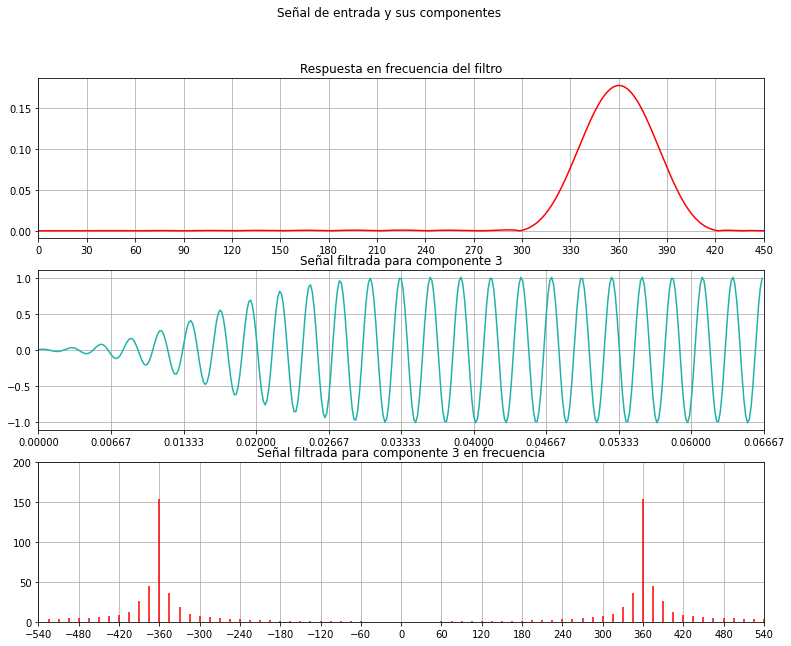

In [19]:
lowcut3 = f3-5
highcut3 = f3+5

ntaps = 200
taps_hamming3 = bandpass_firwin(ntaps, lowcut3, highcut3, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x3 = 5.71*lfilter(taps_hamming3, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming3, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x3,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 3')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x3)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 3 en frecuencia')
axs[2].grid()

plt.show()

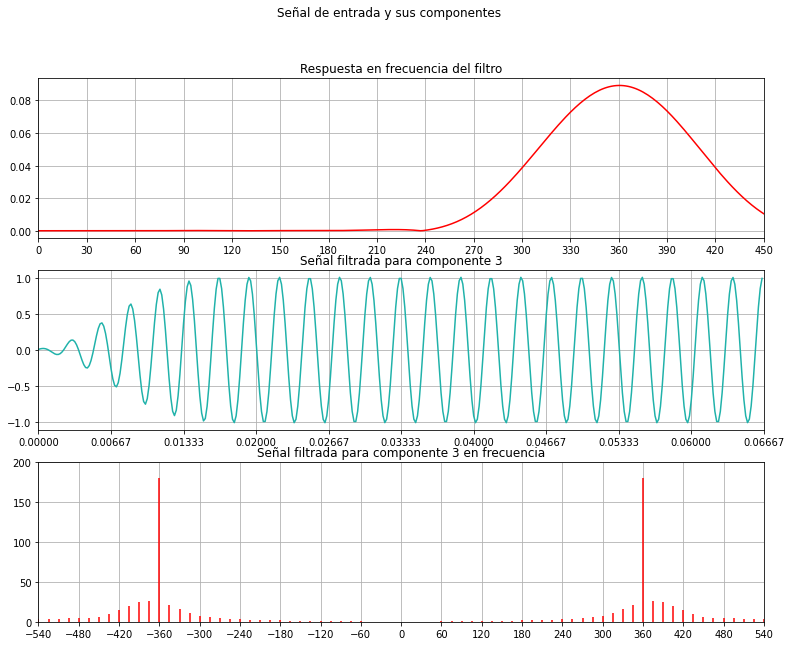

In [21]:
lowcut3 = f3-5
highcut3 = f3+5

ntaps = 100
taps_hamming3 = bandpass_firwin(ntaps, lowcut3, highcut3, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x3 = 2*5.71*lfilter(taps_hamming3, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming3, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x3,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 3')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x3)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 3 en frecuencia')
axs[2].grid()

plt.show()

C:\Users\TEC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

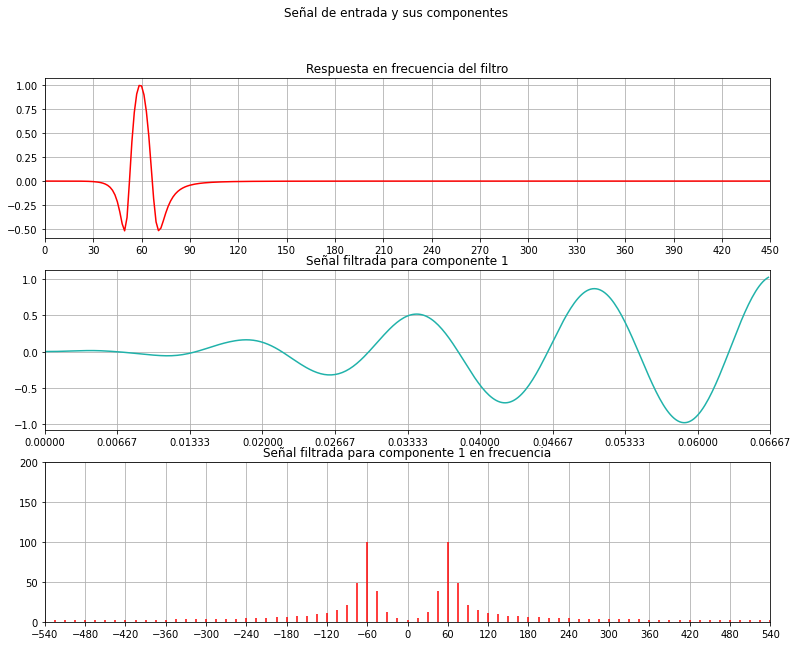

In [92]:
#------------------------------------------------
# Filtro IIR para filtrar componente 1
#------------------------------------------------
from  scipy import signal

def bandpass_IIR(N, Wn, fs):
    b, a = signal.iirfilter(N=N, Wn=Wn, btype='band',
                       analog=False, ftype='butter', fs=fs,
                       output='ba')
    w, h = signal.freqz(b, a, worN=2000, fs=fs)
    fig = plt.figure()
    return w, h, b, a

w, h, b, a = bandpass_IIR(3, [50, 70], fs=6000)

filtered_x1 = lfilter(b, a, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')


axs[0].plot(w,h,color='red')
axs[0].set_title('Respuesta en frecuencia del filtro con filtro IIR')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x1,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 1')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x1)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 1 en frecuencia')
axs[2].grid()

plt.show()

C:\Users\TEC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

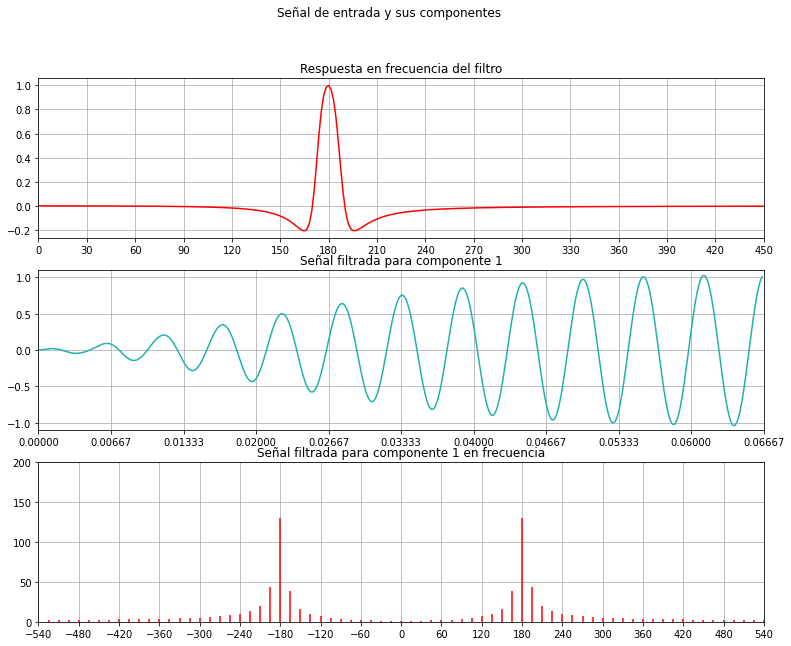

In [95]:
w, h, b, a = bandpass_IIR(2, [170, 190], 6000)

filtered_x2 = lfilter(b, a, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes con filtro IIR')


axs[0].plot(w,h,color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x2,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 2')
axs[1].set(xlim=(0,T), ylim=(-1.1, 1.1))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x2)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 1 en frecuencia')
axs[2].grid()

plt.show()

C:\Users\TEC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

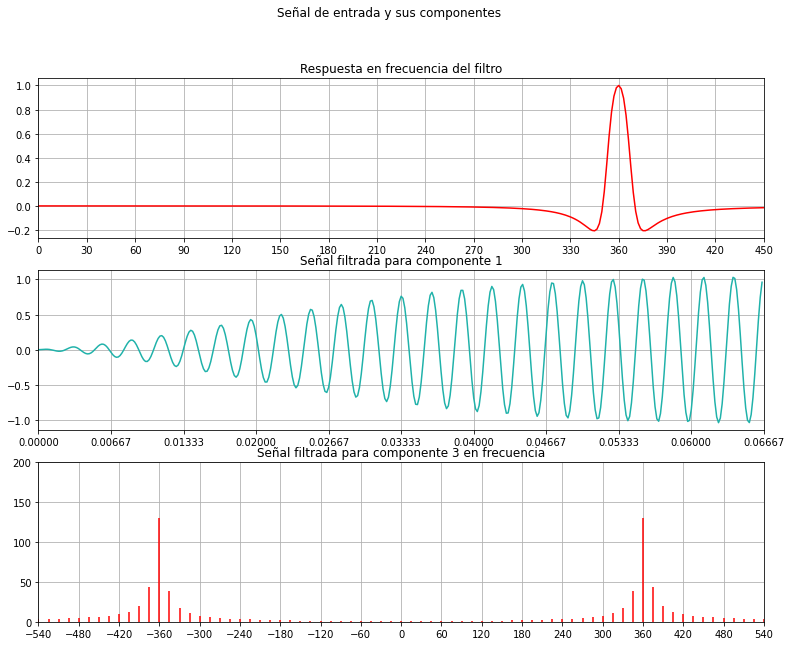

In [97]:
w, h, b, a = bandpass_IIR(2, [350, 370], 6000)

filtered_x3 = lfilter(b, a, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes con filtro IIR')


axs[0].plot(w,h,color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x3,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 3')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x3)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 3 en frecuencia')
axs[2].grid()

plt.show()